<a href="https://colab.research.google.com/github/ajinshanid/netflix-data-analysis-/blob/main/netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries requried
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Upload Netflix CSV File
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [4]:
# Load the Uploaded Dataset
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [5]:
# Check structure
df.info()

# Check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


,0
show_id,0
title,0
director,1901
cast,556
country,427
date_added,642
release_year,0
rating,10
duration,0
listed_in,0


In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with nulls in critical columns (like title and type)
df.dropna(subset=['title', 'type'], inplace=True)

# Fill or impute remaining columns
df['director'].fillna('Not Available', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Not Specified', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Not Available', inplace=True)


/tmp/ipython-input-2078716028.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Not Available', inplace=True)
/tmp/ipython-input-2078716028.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [7]:
# Total missing values BEFORE vs AFTER
print("Missing values (after cleaning):")
print(df.isnull().sum())


Missing values (after cleaning):
show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64


In [8]:
# Export to Excel
df.to_excel("netflix_cleaned.xlsx", index=False)

# Download Excel file in Colab
from google.colab import files
files.download("netflix_cleaned.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import pandas as pd
from IPython.display import display

# Define placeholder values for imputation
placeholders = {
    'director':     'Not Available',
    'cast':         'Not Available',
    'country':      'Not Specified',
    'rating':       'Not Rated',
    'duration':     'Unknown',
    'date_added':   'Not Available'
}

# Fill missing values in the DataFrame using placeholders
for col, val in placeholders.items():
    df[col].fillna(val, inplace=True)

# Collect a preview of up to each row per placeholder column
placeholder_rows = []

for col, val in placeholders.items():
    match = df[df[col] == val].copy()
    if not match.empty:
        match = match.sample(n=min(1, len(match)), random_state=1)  # random 6 rows or fewer
        match['Placeholder Column'] = col
        match['Placeholder Value'] = val
        placeholder_rows.append(match)

# Combine sampled rows
imputed_preview_df = pd.concat(placeholder_rows, ignore_index=True)

# Display the preview
print("Preview of Rows Containing Placeholder Values :")
display(imputed_preview_df)


Preview of Rows Containing Placeholder Values :


/tmp/ipython-input-3639176958.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(val, inplace=True)


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Placeholder Column,Placeholder Value
0,80230293,Wu Assassins,Not Available,"Iko Uwais, Katheryn Winnick, Byron Mann, Tommy...",United States,"August 8, 2019",2019,TV-MA,1 Season,"TV Action & Adventure, TV Sci-Fi & Fantasy",An unassuming San Francisco chef becomes the l...,TV Show,director,Not Available
1,80231601,The Darkest Dawn,Not Available,Not Available,United Kingdom,"June 23, 2018",2016,TV-MA,75 min,"Action & Adventure, International Movies, Sci-...",An aspiring filmmaker records the chaos of an ...,Movie,cast,Not Available
2,81047677,I Dream Of Dance,Maria Demeshkina Peek,Not Available,Not Specified,"January 31, 2019",2017,TV-PG,106 min,"Children & Family Movies, Documentaries",Experience the joy and sacrifice of one of the...,Movie,country,Not Specified
3,80144119,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Rated,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",Movie,rating,Not Rated
4,80221787,Bad Blood,Not Available,"Anthony LaPaglia, Kim Coates, Enrico Colantoni...",Canada,Not Available,2019,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas",This sprawling crime drama follows the true st...,TV Show,date_added,Not Available


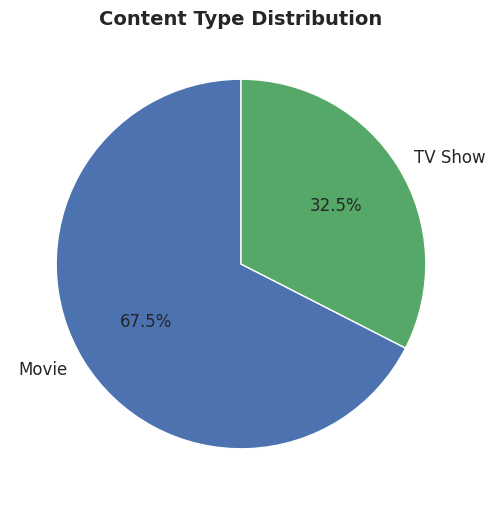

In [ ]:
import matplotlib.pyplot as plt

# Count values
type_counts = df['type'].value_counts()

# Professional color palette (blue + green)
colors = ["#4C72B0", "#55A868"]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize':12}
)

# Title
plt.title("Content Type Distribution", fontsize=14, weight='bold')

plt.show()





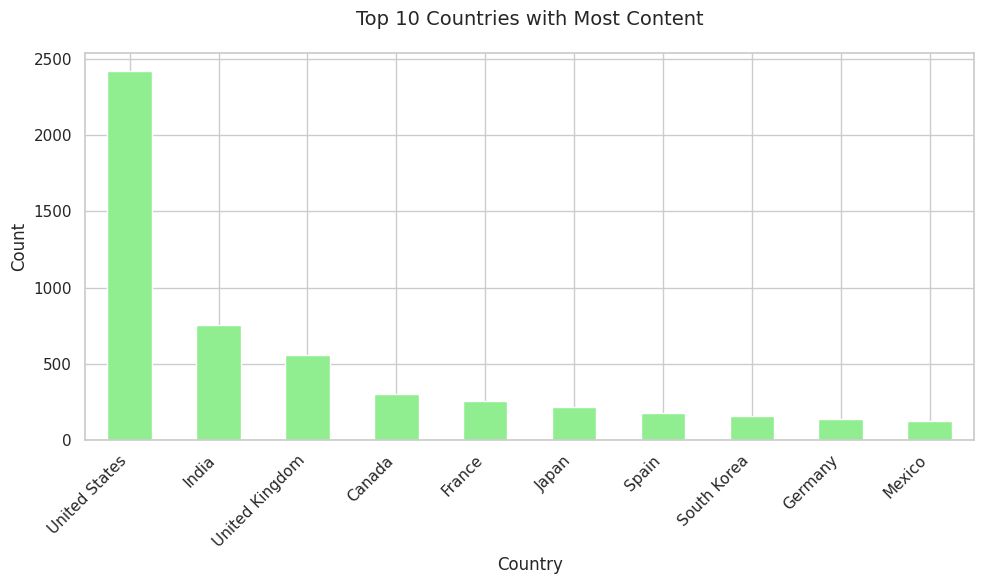

In [ ]:
import matplotlib.pyplot as plt

# Top 10 countries
top_countries = (
    df['country']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)

# Plot vertical bar chart
top_countries.plot(kind='bar', figsize=(10, 6), color='lightgreen')

plt.title("Top 10 Countries with Most Content", fontsize=14, pad=20)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
